In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, f1_score, roc_curve 
from sklearn.metrics import auc, recall_score, roc_auc_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
# Importing the cleaned Dataset into a pandas variable called df
df  = pd.read_csv("cleaned_movies_database.csv", encoding='latin-1')
df.head()

,adult,genres,imdb_id,popularity,runtime,vote_count,production_countries,original_language,title,year,...,Family,Mystery,Thriller,Western,War,Documentary,TV Movie,Foreign,Language,hit
0,False,"Animation, Comedy, Family",tt0114709,21.946943,81,5415,United States of America,en,Toy Story,1995,...,1,0,0,0,0,0,0,0,English,1
1,False,"Adventure, Fantasy, Family",tt0113497,17.015539,104,2413,United States of America,en,Jumanji,1995,...,1,0,0,0,0,0,0,0,English,1
2,False,"Romance, Comedy",tt0113228,11.712900,101,92,United States of America,en,Grumpier Old Men,1995,...,0,0,0,0,0,0,0,0,English,1
3,False,"Comedy, Drama, Romance",tt0114885,3.859495,127,34,United States of America,en,Waiting to Exhale,1995,...,0,0,0,0,0,0,0,0,English,1
4,False,Comedy,tt0113041,8.387519,106,173,United States of America,en,Father of the Bride Part II,1995,...,0,0,0,0,0,0,0,0,English,1


In [3]:
# Accessing only the genres related columns from the dataframe
genres = df[df.columns[125:144]]
genres.head()

,Animation,Adventure,Romance,Comedy,Action,History,Drama,Crime,Fantasy,Science Fiction,Music,Horror,Family,Mystery,Thriller,Western,War,Documentary,TV Movie
0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

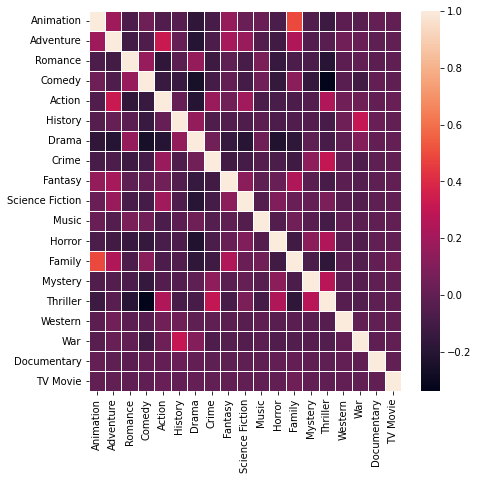

In [4]:
# Using the matplotlib library to retireve a subplot of size 7x7
fig, ax = plt.subplots(figsize=(7,7))
# Using the Seaborn library to plot the heatmap on our subplot
sns.heatmap(genres.corr(), linewidths=.5, ax=ax)

Family and Animation have slightly higher correlation with each other, compared to other genres

In [5]:
# Converting the Bool column "adult" into 1s and 0s
df["adult"].replace(True,'1', inplace=True)
df['adult'].replace(False,'0', inplace=True)

In [6]:
# Retriving the correlation values of only the target variable

cor = df.corr()
cor_tar = cor["hit"]

#Using a threshold value of 0.04 we choose the columns only that have correlation greater than threshold

threshold = 0.04
rel_cor = cor_tar[abs(cor_tar) > threshold ]
rel_cor

popularity                  0.226071
runtime                     0.092182
vote_count                  0.344354
budget                      0.176337
worlwide_gross_income       0.372973
weighted_average_vote       0.193240
United States of America    0.206816
Germany                    -0.058413
France                     -0.109131
Italy                      -0.043549
Belgium                    -0.046935
Netherlands                -0.046678
Luxembourg                 -0.044090
Finland                    -0.045912
Animation                   0.073908
Adventure                   0.096691
Comedy                      0.061365
Action                      0.045114
Drama                      -0.136708
Fantasy                     0.059197
Family                      0.108005
Foreign                    -0.073332
hit                         1.000000
Name: hit, dtype: float64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8992 entries, 0 to 8991
Columns: 147 entries, adult to hit
dtypes: float64(4), int64(135), object(8)
memory usage: 10.1+ MB


In [8]:
# rel_cols only contain those columns that have greater correlation with our 
# target variable.

rel_cols = ["popularity","runtime","vote_count","worlwide_gross_income",
            "weighted_average_vote","United States of America","Germany","France",
            "Italy","Belgium","Netherlands","Luxembourg","Finland","Animation",
            "Adventure","Comedy","Action","Drama","Fantasy","Family","Foreign",
            "hit"]

# Filtering out the columns that are irrelevant to our model
df = df[rel_cols]
df.head()

,popularity,runtime,vote_count,worlwide_gross_income,weighted_average_vote,United States of America,Germany,France,Italy,Belgium,...,Finland,Animation,Adventure,Comedy,Action,Drama,Fantasy,Family,Foreign,hit
0,21.946943,81,5415,404265438.0,8.3,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,1
1,17.015539,104,2413,262821940.0,7.0,1,0,0,0,0,...,0,0,1,0,0,0,1,1,0,1
2,11.712900,101,92,71518503.0,6.7,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,3.859495,127,34,81452156.0,5.9,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
4,8.387519,106,173,76594107.0,6.1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


<AxesSubplot:>

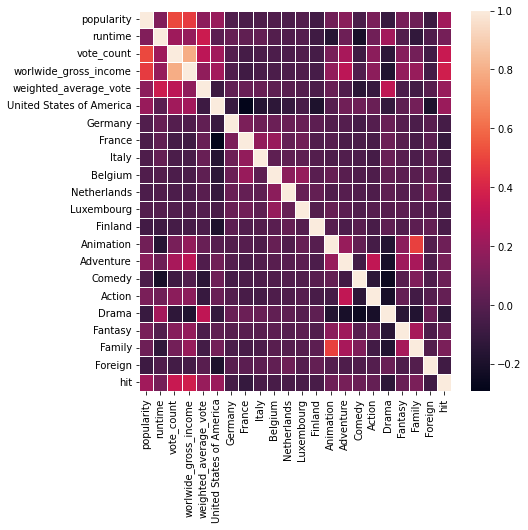

In [9]:
# creating a Heat map for relevant Columns
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(df.corr(), linewidths=.5, ax=ax)

### Data Modeling

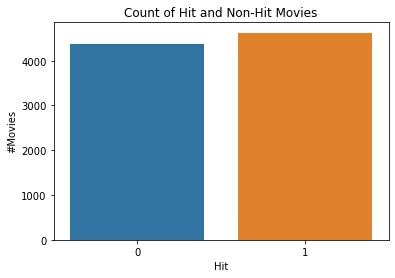

In [10]:
#Check Class Balance of the y-variable

p = sns.countplot(x='hit',data = df)
plt.title('Count of Hit and Non-Hit Movies')
p.set(xlabel = 'Hit', ylabel = '#Movies')
plt.show()

It can be seen that the class balance is almost 50%, hence resampling is not required

In [11]:
# Splitting data into Test and Training set

X = df.drop('hit', axis = 1)
y = df['hit']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0,stratify = y)

In [12]:
# Normalize Columns using standard scaler for training dataset
# Mean = 0 and Standard Deviation = 1

x_train_scaled = x_train.copy()
x_train_scaled = pd.DataFrame(StandardScaler().fit_transform(x_train_scaled))
x_train_scaled.columns = x_train.columns
x_train_scaled.describe()

x_test_scaled = x_test.copy()
x_test_scaled = pd.DataFrame(StandardScaler().fit_transform(x_test_scaled))
x_test_scaled.describe()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
count,1.799000e+03,1.799000e+03,1.799000e+03,1.799000e+03,1.799000e+03,1.799000e+03,1.799000e+03,1.799000e+03,1.799000e+03,1.799000e+03,...,1.799000e+03,1.799000e+03,1.799000e+03,1.799000e+03,1.799000e+03,1.799000e+03,1.799000e+03,1.799000e+03,1.799000e+03,1.799000e+03
mean,3.060982e-17,1.819618e-16,2.900527e-18,-5.060494e-18,3.343629e-16,-2.800551e-16,2.334616e-16,-2.182184e-16,-1.695883e-16,7.399275e-16,...,6.131838e-16,-2.671262e-16,-6.143563e-17,-3.596654e-16,-4.848200e-16,2.833877e-16,4.181696e-16,-1.396696e-15,2.409289e-16,-4.547039e-16
std,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,...,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00
min,-8.017136e-01,-4.712495e+00,-4.782308e-01,-4.719722e-01,-4.452513e+00,-1.475956e+00,-2.938582e-01,-3.313740e-01,-1.637879e-01,-1.086785e-01,...,-7.090792e-02,-1.280007e-01,-1.905002e-01,-4.045345e-01,-7.557639e-01,-5.630132e-01,-1.024195e+00,-3.198882e-01,-3.016028e-01,-1.345726e-01
25%,-5.075227e-01,-5.781426e-01,-4.522519e-01,-4.601860e-01,-5.501888e-01,-1.475956e+00,-2.938582e-01,-3.313740e-01,-1.637879e-01,-1.086785e-01,...,-7.090792e-02,-1.280007e-01,-1.905002e-01,-4.045345e-01,-7.557639e-01,-5.630132e-01,-1.024195e+00,-3.198882e-01,-3.016028e-01,-1.345726e-01
50%,-8.942330e-02,-1.780440e-01,-3.639236e-01,-3.751161e-01,5.016885e-02,6.775271e-01,-2.938582e-01,-3.313740e-01,-1.637879e-01,-1.086785e-01,...,-7.090792e-02,-1.280007e-01,-1.905002e-01,-4.045345e-01,-7.557639e-01,-5.630132e-01,9.763768e-01,-3.198882e-01,-3.016028e-01,-1.345726e-01
75%,2.775053e-01,4.887870e-01,-3.243277e-02,-3.654496e-02,7.505861e-01,6.775271e-01,-2.938582e-01,-3.313740e-01,-1.637879e-01,-1.086785e-01,...,-7.090792e-02,-1.280007e-01,-1.905002e-01,-4.045345e-01,1.323165e+00,-5.630132e-01,9.763768e-01,-3.198882e-01,-3.016028e-01,-1.345726e-01
max,3.045374e+01,8.046205e+00,8.956269e+00,9.495719e+00,2.551659e+00,6.775271e-01,3.403002e+00,3.017738e+00,6.105456e+00,9.201449e+00,...,1.410280e+01,7.812457e+00,5.249339e+00,2.471977e+00,1.323165e+00,1.776157e+00,9.763768e-01,3.126093e+00,3.315620e+00,7.430932e+00


In [13]:
# Normalize Columns using standard scaler for testing dataset
# Mean = 0 and Standard Deviation = 1

x_test_scaled = x_test.copy()
x_test_scaled = pd.DataFrame(StandardScaler().fit_transform(x_test_scaled))
x_test_scaled.columns = x_test.columns
x_test_scaled.describe()

,popularity,runtime,vote_count,worlwide_gross_income,weighted_average_vote,United States of America,Germany,France,Italy,Belgium,...,Luxembourg,Finland,Animation,Adventure,Comedy,Action,Drama,Fantasy,Family,Foreign
count,1.799000e+03,1.799000e+03,1.799000e+03,1.799000e+03,1.799000e+03,1.799000e+03,1.799000e+03,1.799000e+03,1.799000e+03,1.799000e+03,...,1.799000e+03,1.799000e+03,1.799000e+03,1.799000e+03,1.799000e+03,1.799000e+03,1.799000e+03,1.799000e+03,1.799000e+03,1.799000e+03
mean,3.060982e-17,1.819618e-16,2.900527e-18,-5.060494e-18,3.343629e-16,-2.800551e-16,2.334616e-16,-2.182184e-16,-1.695883e-16,7.399275e-16,...,6.131838e-16,-2.671262e-16,-6.143563e-17,-3.596654e-16,-4.848200e-16,2.833877e-16,4.181696e-16,-1.396696e-15,2.409289e-16,-4.547039e-16
std,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,...,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00,1.000278e+00
min,-8.017136e-01,-4.712495e+00,-4.782308e-01,-4.719722e-01,-4.452513e+00,-1.475956e+00,-2.938582e-01,-3.313740e-01,-1.637879e-01,-1.086785e-01,...,-7.090792e-02,-1.280007e-01,-1.905002e-01,-4.045345e-01,-7.557639e-01,-5.630132e-01,-1.024195e+00,-3.198882e-01,-3.016028e-01,-1.345726e-01
25%,-5.075227e-01,-5.781426e-01,-4.522519e-01,-4.601860e-01,-5.501888e-01,-1.475956e+00,-2.938582e-01,-3.313740e-01,-1.637879e-01,-1.086785e-01,...,-7.090792e-02,-1.280007e-01,-1.905002e-01,-4.045345e-01,-7.557639e-01,-5.630132e-01,-1.024195e+00,-3.198882e-01,-3.016028e-01,-1.345726e-01
50%,-8.942330e-02,-1.780440e-01,-3.639236e-01,-3.751161e-01,5.016885e-02,6.775271e-01,-2.938582e-01,-3.313740e-01,-1.637879e-01,-1.086785e-01,...,-7.090792e-02,-1.280007e-01,-1.905002e-01,-4.045345e-01,-7.557639e-01,-5.630132e-01,9.763768e-01,-3.198882e-01,-3.016028e-01,-1.345726e-01
75%,2.775053e-01,4.887870e-01,-3.243277e-02,-3.654496e-02,7.505861e-01,6.775271e-01,-2.938582e-01,-3.313740e-01,-1.637879e-01,-1.086785e-01,...,-7.090792e-02,-1.280007e-01,-1.905002e-01,-4.045345e-01,1.323165e+00,-5.630132e-01,9.763768e-01,-3.198882e-01,-3.016028e-01,-1.345726e-01
max,3.045374e+01,8.046205e+00,8.956269e+00,9.495719e+00,2.551659e+00,6.775271e-01,3.403002e+00,3.017738e+00,6.105456e+00,9.201449e+00,...,1.410280e+01,7.812457e+00,5.249339e+00,2.471977e+00,1.323165e+00,1.776157e+00,9.763768e-01,3.126093e+00,3.315620e+00,7.430932e+00


In [14]:
#Create a helper function to calculate Model Metrics

def eval_metrics(test_y, predicted_y):
    print('Accuracy: ', accuracy_score(test_y, predicted_y))
    print('Precision: ', precision_score(test_y, predicted_y))
    print('Recall: ', recall_score(test_y, predicted_y))
    print('F1-Score: ', f1_score(test_y, predicted_y))
    cm = confusion_matrix(test_y, predicted_y)
    tn, fp, fn, tp = cm.ravel()
    print('Specificity: ', tn / (tn+fp))
    print('Sensitivity: ', recall_score(test_y, predicted_y))


Logistic Regression

In [15]:
# Using Logistic Regression model from Sklearn to model our data.
# Since it is a basic model, the we used mse to calculate error. 

# loading the LogisticRegression module in to lr
lr = LogisticRegression()

# Fitting the model to our train set
lr.fit(x_train_scaled, y_train)

# Using the trained model to predict out X_Test
pred = lr.predict(x_test_scaled)

# Calculating our evaluation metrics using sklearn build-in package.
eval_metrics(y_test, pred)

Accuracy:  0.7998888271261813
Precision:  0.9029957203994294
Recall:  0.6843243243243243
F1-Score:  0.7785977859778599
Specificity:  0.9221967963386728
Sensitivity:  0.6843243243243243



KNN:


In [16]:
# Using KneighborsClassifier model from Sklearn to model our data.
# Since it is a basic model, the we used mse to calculate error. 

# loading the KNeighborsClassifier module in to knn
knn = KNeighborsClassifier()

# Fitting the model to our train set
knn.fit(x_train, y_train)

#  Using the trained model to predict out X_Test
y_pred_knn = knn.predict(x_test)

# Calculating our evaluation metrics using sklearn build-in package.
eval_metrics(y_test, y_pred_knn)

Accuracy:  0.7843246247915509
Precision:  0.7841269841269841
Recall:  0.8010810810810811
F1-Score:  0.7925133689839572
Specificity:  0.7665903890160183
Sensitivity:  0.8010810810810811



Decision Tree:

In [17]:
# Using KneighborsClassifier model from Sklearn to model our data.
# For Decision Tree we take Cross-Entropy Loss as loss function.
# We set that minimum split samples to be 5
# minimum number of leaf nodes is 6
# and we set the max_features to auto to facilitate the model to random skip a few features.
# Random State is set as 50.

# loading the KNeighborsClassifier module in to dt with hyperparameters
dt = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=5, 
                                 min_samples_leaf=6, max_features='auto', 
                                 random_state=50)

# Fitting the model to our train set
dt.fit(x_train, y_train)

#  Using the trained model to predict out X_Test
y_pred_dt = dt.predict(x_test)

# Calculating our evaluation metrics using sklearn build-in package.
eval_metrics(y_test, y_pred_dt)

Accuracy:  0.7643135075041689
Precision:  0.7743702081051479
Recall:  0.7643243243243243
F1-Score:  0.7693144722524484
Specificity:  0.7643020594965675
Sensitivity:  0.7643243243243243


Random  Forest


In [18]:
# Using RandomForestClassifier model from Sklearn to model our data.
# For Random Forest, we take Cross-Entropy Loss as loss function.
# We set that minimum split samples to be 5
# minimum number of leaf nodes is 6
# and we set the max_features to auto to facilitate the model to random skip a few features.
# Random State is set as 50.

# loading the KNeighborsClassifier module in to rf with hyperparameters
rf = RandomForestClassifier(n_estimators=50, 
                            criterion='entropy', min_samples_split=5, 
                            min_samples_leaf=6, max_features='auto', 
                            random_state=50)

# Fitting the model to our train set
rf.fit(x_train, y_train)

#  Using the trained model to predict out X_Test
y_pred_rf = rf.predict(x_test)

# Calculating our evaluation metrics using sklearn build-in package.
eval_metrics(y_test, y_pred_rf)

Accuracy:  0.8371317398554753
Precision:  0.8405172413793104
Recall:  0.8432432432432433
F1-Score:  0.8418780356179171
Specificity:  0.8306636155606407
Sensitivity:  0.8432432432432433


### Selecting the best model

#### Random Forest gave the best results

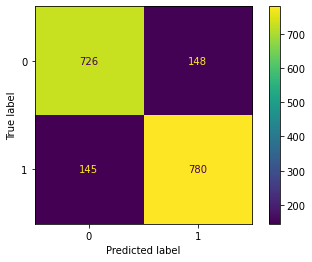

In [19]:
# Visualize Confusion Matrix

plot_confusion_matrix(rf, x_test, y_test)

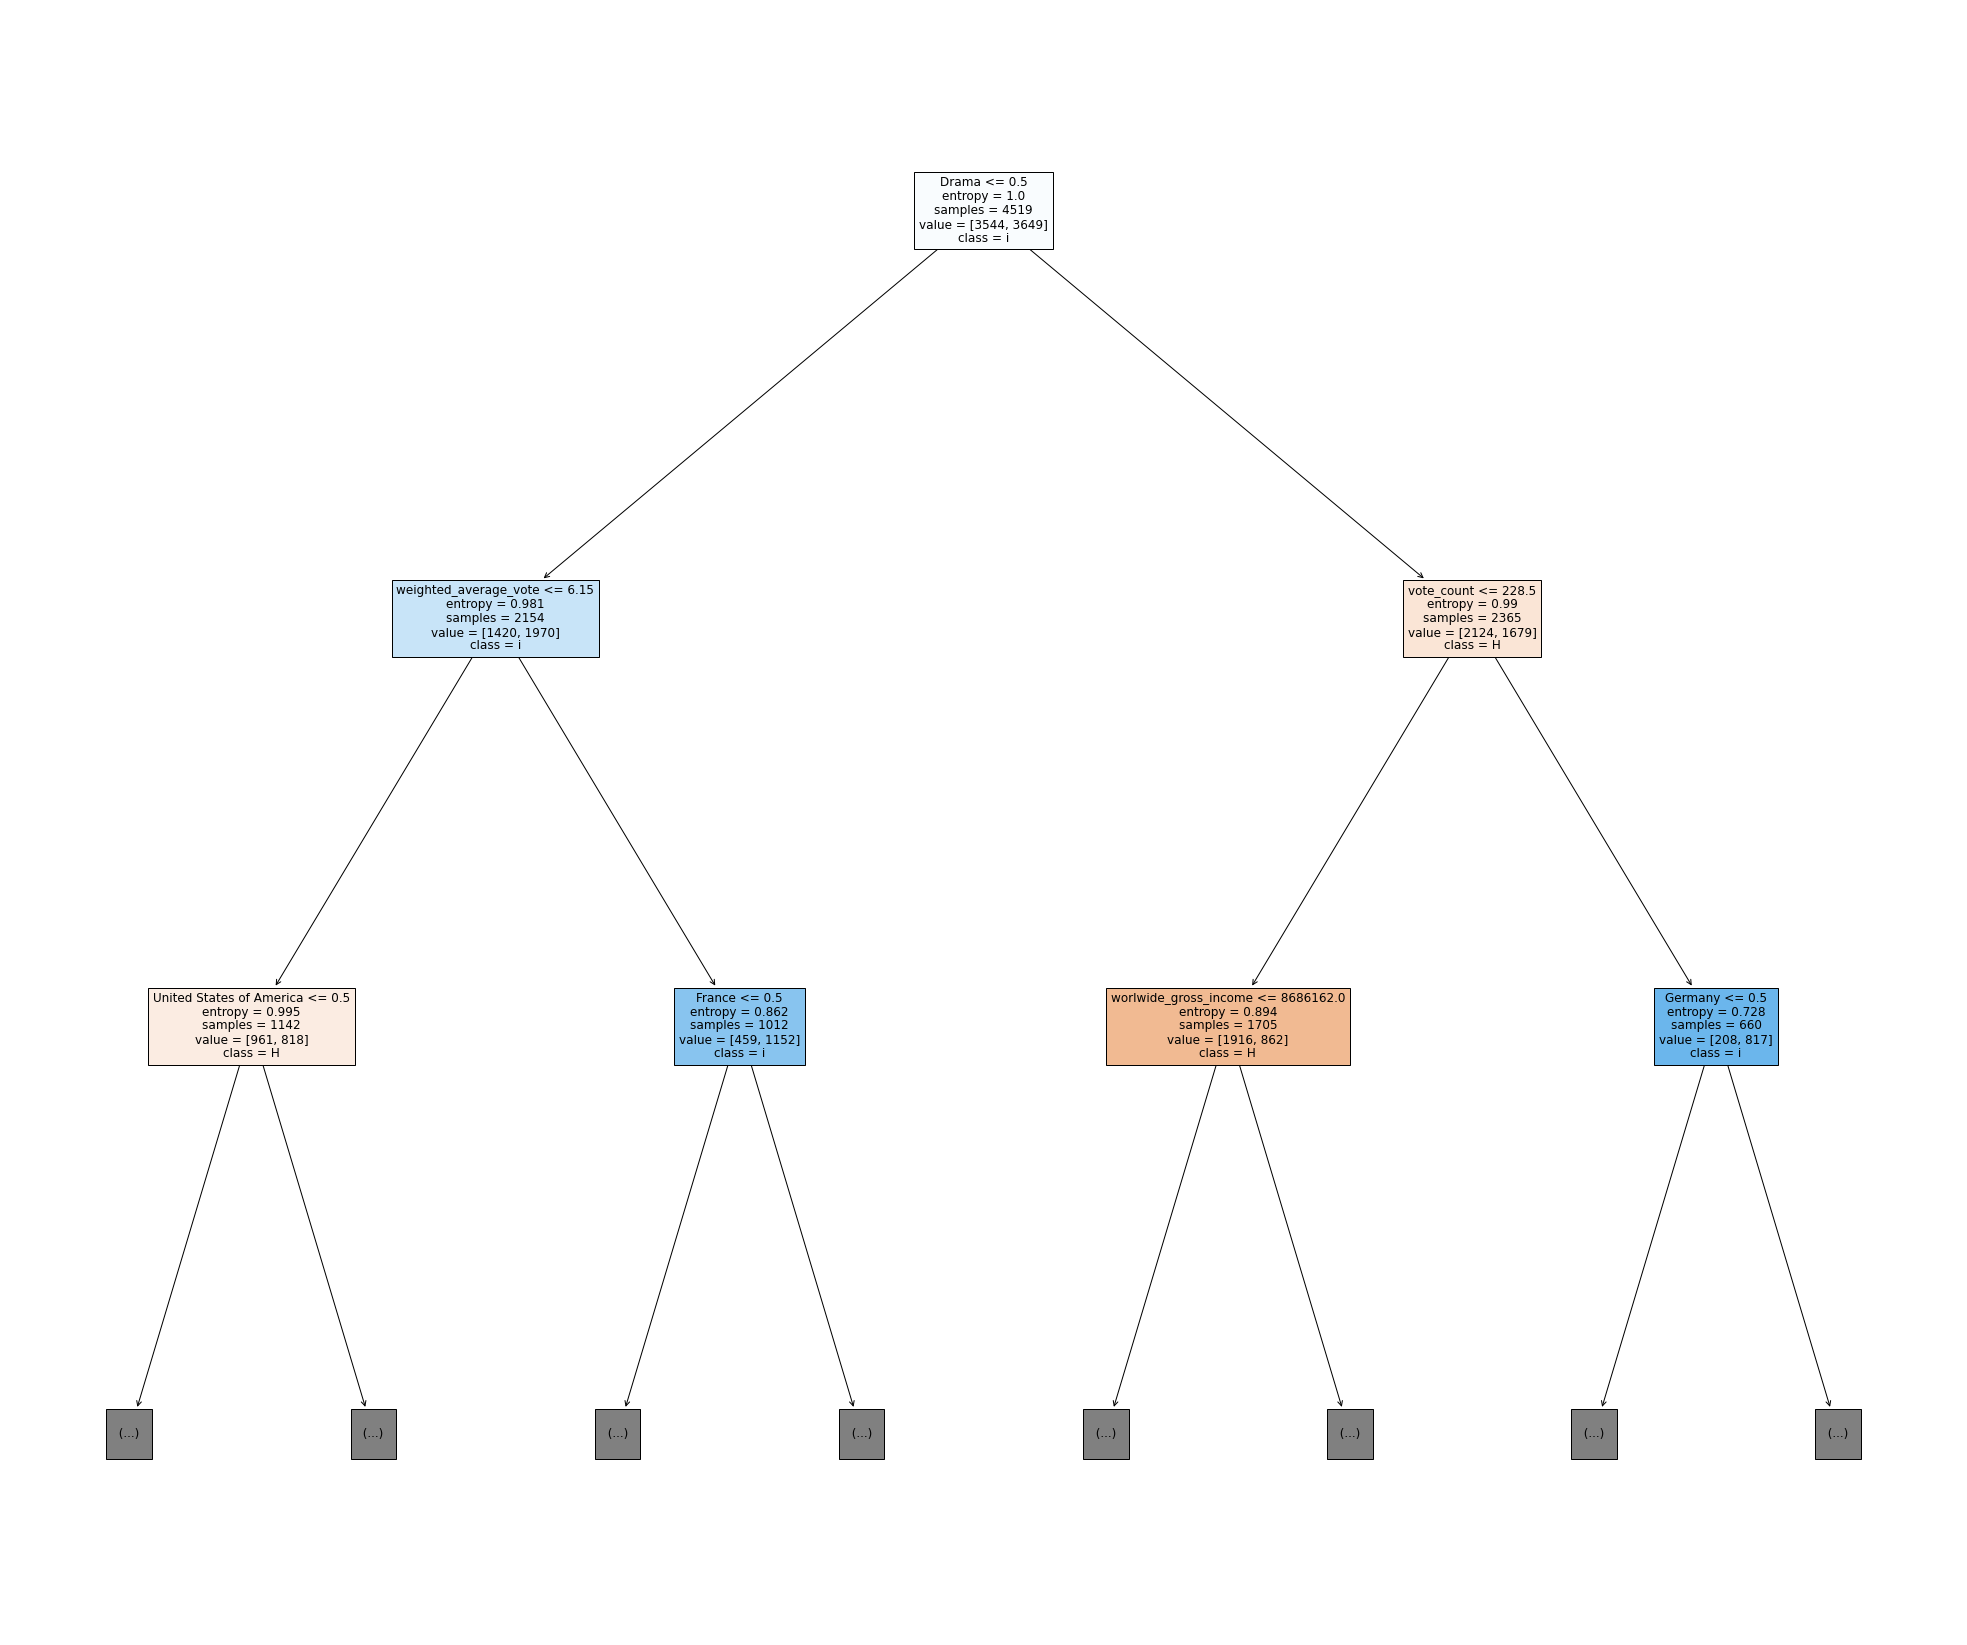

In [20]:
#Extract single tree
estimator = rf.estimators_[5]

fig = plt.figure(figsize=(35,30))
DTree = tree.plot_tree(estimator, 
                feature_names = x_train.columns,
                class_names = 'Hit',
                filled=True,
                max_depth = 2)